# Hippocampus FC <a id='bct-graph-metrics'></a>

In [41]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib  # load the beta maps in python
from nilearn import plotting  # plot nifti images
from bct import nbs
from scipy.io import savemat
from mne.viz import plot_connectivity_circle

In [42]:
data_dir = '/Volumes/psybrain/ADM/derivatives'
results_dir = '/Volumes/schnyer/Megan/adm_mem-fc/analysis/nbs/withhc/stats/'
nibs_dir='/Volumes/psybrain/ADM/derivatives/nibs/nibetaseries'

tasks = ['MemMatch1', 'MemMatch2', 'MemMatch3']
trial_types = ['cue', 'match', 'mismatch']

hc_coords = [-21,-9,-15]

atlas_file='/Volumes/psybrain/ADM/derivatives/nibs/power264-master/power264MNI.nii.gz'
atlas_lut='/Volumes/psybrain/ADM/derivatives/nibs/power264_labels.tsv'

In [43]:
subjects = np.loadtxt(data_dir + '/nibs/subjects.txt', dtype=str)
subjects

array(['30004', '30008', '30009', '30015', '30019', '30020', '30023',
       '30040', '30057', '30064', '30066', '30069', '30074', '30085',
       '30088', '30090', '30091', '30095', '30096', '30105', '30116',
       '30118', '30119', '30128', '30181', '30217', '30227', '30236',
       '30242', '30255', '30274', '30283', '30295', '30330', '30346',
       '30376', '30395', '30400', '30403', '30412', '30426', '30432',
       '30466', '30469', '30476', '30478', '30568', '30570', '30581',
       '30584', '30588', '40160', '40170', '40175', '40288', '40351',
       '40490', '40512', '40519', '40520', '40524', '40547', '40564',
       '40615', '40619', '40624', '40638', '40649', '40650', '40656',
       '40658', '40664', '40665', '40668', '40672', '40685', '40694',
       '40720', '40738', '40743', '40750', '40773', '40778', '40796',
       '40803', '40855', '40861', '40930', '40961', '40968'], dtype='<U5')

In [44]:
atlas = pd.read_csv(atlas_lut, sep='\t').set_index('index')
atlas = atlas.append({'regions': 'HC Sherman'}, ignore_index=True)
print(atlas.shape)
#remove nodes with low signal
atlas=atlas.drop([3,9,183], axis=0)
atlas = atlas.reset_index(drop=True)

atlas.regions.unique()

(265, 1)


array(['Uncertain', 'Sensory/somatomotor Hand',
       'Sensory/somatomotor Mouth', 'Cingulo-opercular Task Control',
       'Auditory', 'Default mode', 'Memory retrieval?',
       'Ventral attention', 'Visual', 'Fronto-parietal Task Control',
       'Salience', 'Subcortical', 'Cerebellar', 'Dorsal attention',
       'HC Sherman'], dtype=object)

In [45]:
hc = atlas.loc[atlas['regions'].str.contains('HC')].index.tolist()
dmn = atlas.loc[atlas['regions'].str.contains('Default')].index.tolist()
mem = atlas.loc[atlas['regions'].str.contains('Memory')].index.tolist()
fpn = atlas.loc[atlas['regions'].str.contains('Fronto-parietal')].index.tolist()

dmn_hc = np.concatenate((dmn, hc))
fpn_hc = np.concatenate((fpn, hc))
mem_hc = np.concatenate((mem, hc))

In [46]:
atlas.shape

(262, 1)

In [47]:
hc_labels = atlas['regions'].str.contains('HC')
hc = atlas.loc[hc_labels].index.tolist()

In [53]:
x = np.load('/Volumes/schnyer/Megan/adm_mem-fc/analysis/nbs/withhc/memmatch_fc_withhc_clean.npy', allow_pickle=True).flat[0]
fc_subs = np.loadtxt('/Volumes/schnyer/Megan/adm_mem-fc/analysis/nbs/withhc/fcsubs.txt', dtype=str)
print(len(fc_subs))
print(x['cue'].shape)

88
(264, 264, 88)


In [62]:
hc_dmn_fc = x['cue'][dmn_hc,-1].mean(axis=0)
hc_fpn_fc = x['cue'][fpn_hc,-1].mean(axis=0)
dmn_fpn_fc = x['cue'][dmn][:,fpn].mean(axis=0).mean(axis=0)
dmn_fc = x['cue'][dmn][:,dmn].mean(axis=0).mean(axis=0)
fpn_fc = x['cue'][fpn][:,fpn].mean(axis=0).mean(axis=0)

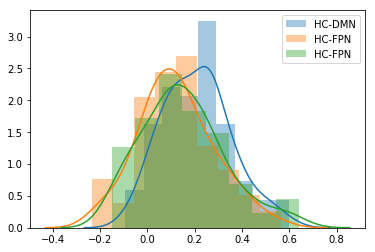

In [55]:
sns.distplot(hc_dmn_fc, label = 'HC-DMN')
sns.distplot(hc_fpn_fc, label = 'HC-FPN')
sns.distplot(hc_mem_fc, label = 'HC-FPN')
plt.legend()

In [63]:
pd.DataFrame({'subject': fc_subs, 
              'hc_dmn_fc': hc_dmn_fc, 
              'hc_fpn_fc': hc_fpn_fc,
             'dmn_fpn_fc': dmn_fpn_fc,
             'dmn_fc': dmn_fc,
             'fpn_fc': fpn_fc}).to_csv('/Volumes/schnyer/Megan/adm_mem-fc/hc_dmn_fpn.csv', index=False)

In [64]:
hc_dmn_fc.shape

(88,)